In [1]:
import sys
import time
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

print(time.strftime('%Y/%m/%d %H:%M'))
print('OS:', sys.platform)
print('Python:', sys.version)
print('NumPy:', np.__version__)
print('Pandas:', pd.__version__)
print('Scikit-Learn:', sklearn.__version__)

# Formatting for seaborn plots
sns.set_context('notebook', font_scale=1.1)
sns.set_style('ticks')

# Displays all dataframe columns
pd.set_option('display.max_columns', None)

%matplotlib inline

2018/07/16 20:32
OS: linux
Python: 3.5.4 |Anaconda custom (64-bit)| (default, Nov 20 2017, 18:44:38) 
[GCC 7.2.0]
NumPy: 1.14.1
Pandas: 0.22.0
Scikit-Learn: 0.19.1


In [30]:
#import
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import math
import PIL
from PIL import Image, ImageOps

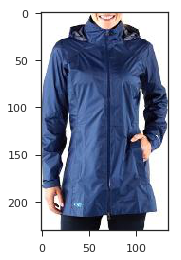

In [25]:
img_path = "gear_images/test_images/101634-Copy1.jpeg"
x = plt.imread(img_path)
plt.imshow(x)

256
(128, 128)


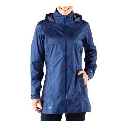

In [34]:
idealSize = 2**( math.floor(np.log2(max(x.shape[0], x.shape[1])))+1 )
print(idealSize)

pad = x.shape[0] - x.shape[1]

padX = idealSize - x.shape[0]
padY = idealSize - x.shape[1]

padx_before = padX//2
padx_after=  idealSize - padx_before - x.shape[0]

pady_before = padY//2
pady_after = idealSize - pady_before - x.shape[1]

newArr = np.pad(x, ((padx_before,padx_after),(pady_before,pady_after),(0,0)),mode='constant', constant_values=255)

im = Image.fromarray(newArr)
im = im.resize((128, 128))
print(im.size)
im

(array([ 2093.,  3503.,  3758.,  3335.,  2505.,  1246.,  1045.,   545.,
          290., 30832.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

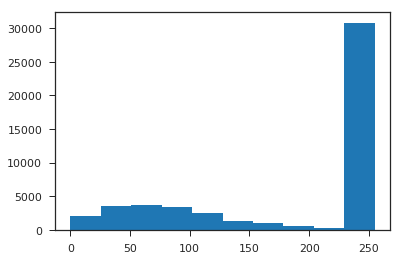

In [41]:
x = np.array(im)

x_flat = x.flatten()

plt.hist(x_flat)

/anaconda/envs/py35/lib/python3.5/site-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "
/anaconda/envs/py35/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


(array([ 2889.,  3047.,  2852.,  2571.,  2267.,  1599.,  1097.,   946.,
          806., 31078.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

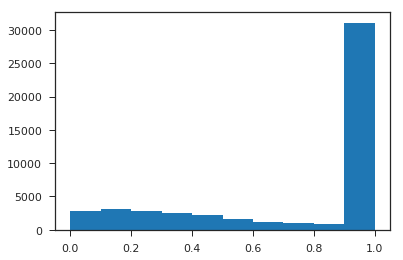

In [54]:
from skimage import exposure

# img = im 
img = x

# Contrast stretching
p2 = np.percentile(img, 2)
p98 = np.percentile(img, 98)
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

plt.hist(img_adapteq.flatten())

(array([ 2889.,  3047.,  2852.,  2571.,  2267.,  1599.,  1097.,   946.,
          806., 31078.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

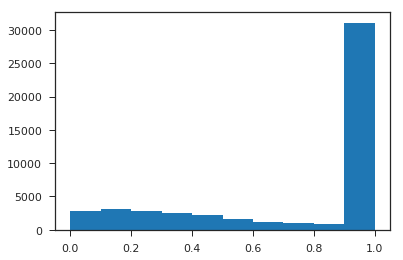

In [58]:
plt.hist(img_adapteq.flatten())

(array([ 2889.,  3047.,  2852.,  2571.,  2267.,  1599.,  1097.,   946.,
          806., 31078.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

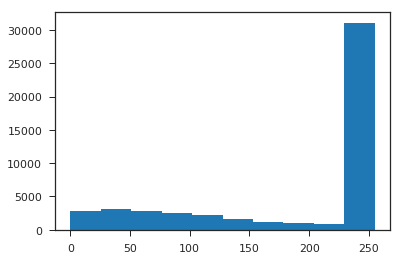

In [61]:
plt.hist((img_adapteq * 255).flatten())

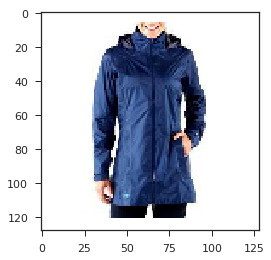

In [68]:
plt.imshow(img_rescale)

In [ ]:
plt.imshow(img)

In [6]:
im = x

avatar_size = (128, 128)
method = Image.NEAREST if im.size == avatar_size else Image.ANTIALIAS
formatted_im = ImageOps.fit(im, avatar_size, method = method, centering = (0.5,0.5)) 
# formatted_im.save('foo.jpg', 'JPEG', quality=95)
formatted_im

TypeError: 'int' object is not subscriptable